In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fname = '../data/Grisoni_et_al_2016_EnvInt88.csv'

df = pd.read_csv(fname)

In [4]:
df.describe()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,1.754814,3.467616,1.550822,0.236881,3.201746,1.510295,0.186136,0.423620,3.585366,1.736842,2.062773
std,1.985866,2.983778,0.958708,0.149319,1.595702,0.834753,0.501937,0.494449,4.430421,0.921782,1.351290
min,0.000000,0.000000,0.000000,0.090000,-1.960000,0.080000,0.000000,0.000000,0.000000,1.000000,-1.700000
25%,0.000000,0.000000,1.210000,0.170000,2.190000,0.910000,0.000000,0.000000,0.000000,1.000000,0.985000
50%,1.000000,4.263000,1.400000,0.200000,3.130000,1.270000,0.000000,0.000000,2.000000,1.000000,2.030000
75%,3.000000,6.250000,2.285000,0.240000,4.235000,2.020000,0.000000,1.000000,6.000000,3.000000,2.950000
max,12.000000,9.316000,5.900000,2.230000,8.320000,7.190000,3.000000,1.000000,25.000000,3.000000,6.060000


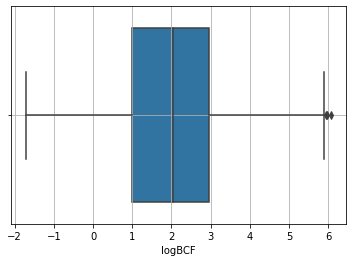

In [51]:
sns.boxplot(x='logBCF', data=df)
plt.grid()

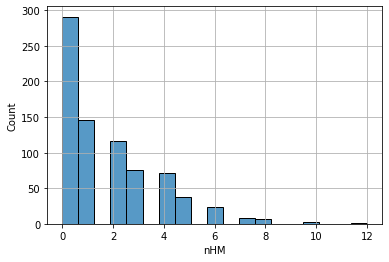

In [44]:
sns.histplot(x='nHM', data=df, fill=True)
plt.grid()

<AxesSubplot:ylabel='Density'>

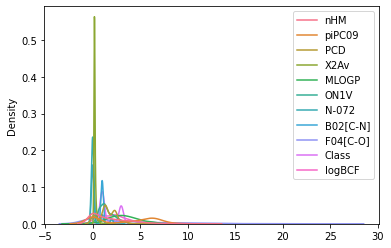

In [48]:
sns.kdeplot(data=df)

In [9]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))


/var/folders/1f/xyznj37x1n337kxt0v5533rw0000gn/T/ipykernel_13758/4025042801.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
nHM,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
piPC09,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
PCD,-0.03,0.74,nan,nan,nan,nan,nan,nan,nan,nan,nan
X2Av,0.20,-0.27,-0.44,nan,nan,nan,nan,nan,nan,nan,nan
MLOGP,0.41,0.51,0.45,-0.12,nan,nan,nan,nan,nan,nan,nan
ON1V,-0.23,0.45,0.12,0.04,0.25,nan,nan,nan,nan,nan,nan
N-072,-0.07,0.13,-0.03,-0.06,-0.20,0.21,nan,nan,nan,nan,nan
B02[C-N],-0.27,0.05,0.10,-0.22,-0.35,0.15,0.38,nan,nan,nan,nan
F04[C-O],-0.13,0.26,0.11,-0.11,-0.10,0.52,0.18,0.23,nan,nan,nan
Class,0.01,0.22,0.13,-0.03,0.19,0.33,0.00,-0.11,0.23,nan,nan


In [13]:
mask = df['Set'] == 'Train'
train = df.loc[mask]

In [14]:
train

,CAS,SMILES,Set,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
0,100-02-7,O=[N+](c1ccc(cc1)O)[O-],Train,0,0.000,1.49,0.14,1.35,0.72,0,1,5,1,0.74
1,100-17-4,O=[N+](c1ccc(cc1)OC)[O-],Train,0,0.000,1.47,0.14,1.70,0.88,0,1,5,1,0.93
2,100-18-5,c1cc(ccc1C(C)C)C(C)C,Train,0,0.000,1.20,0.25,4.14,2.06,0,0,0,3,3.24
3,100-25-4,O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-],Train,0,0.000,1.69,0.13,1.89,0.79,0,1,8,3,-0.40
4,100-40-3,C=CC1CCC=CC1,Train,0,0.000,0.52,0.25,2.65,1.31,0,0,0,1,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,98886-44-3,O=C1N(CCS1)P(=O)(OCC)SC(C)CC,Train,3,2.197,0.23,0.42,0.64,2.35,1,1,7,1,0.50
772,98-95-3,O=[N+](c1ccccc1)[O-],Train,0,0.000,1.50,0.15,1.89,0.73,0,1,4,1,0.66
773,99-08-1,O=[N+](c1cc(ccc1)C)[O-],Train,0,0.000,1.49,0.16,2.24,0.92,0,1,4,1,1.02
774,99-30-9,O=[N+]([O-])c1cc(c(N)c(c1)Cl)Cl,Train,2,0.000,1.48,0.17,2.57,0.73,0,1,4,1,1.88


## ml spart

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
cols = ['nHM', 'piPC09', 'PCD', 'X2Av', 'MLOGP', 'ON1V',
       'N-072', 'B02[C-N]', 'F04[C-O]']
X = train[cols]
y = train['logBCF']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
predicted = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [31]:
print("MAPE, %", round(mean_absolute_percentage_error(predicted, y_test) * 100, 2))

MAPE, % 39.33


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
model = RandomForestRegressor()


In [34]:
model.fit(X_train, y_train)

predicted = model.predict(X_test)

print("MAPE, %", round(mean_absolute_percentage_error(predicted, y_test) * 100, 2))

MAPE, % 49.79


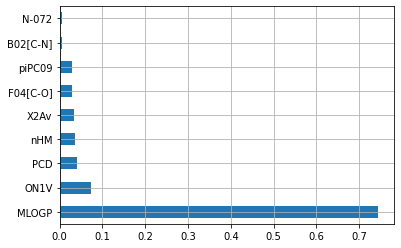

In [46]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.grid()

In [36]:
from sklearn.preprocessing import StandardScaler

In [47]:
# normilize dataset -> better do it first step 
scaler = StandardScaler()
scaled = scaler.fit_transform(X_train)

## End 